In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("Set2")
pd.set_option("display.max_columns", None)

df = pd.read_csv("Churn_Modelling.csv")

print(df.shape)
print(df.head())
print(df.info())


(10000, 14)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


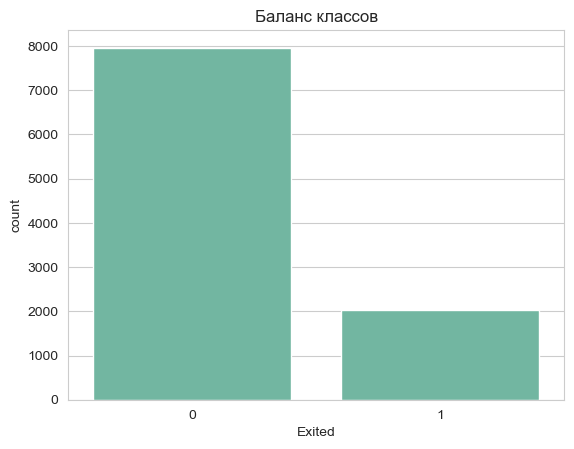

In [6]:
class_balance = df['Exited'].value_counts(normalize=True) * 100
print(class_balance)

sns.countplot(data=df, x='Exited')
plt.title("Баланс классов")
plt.show()
# 0 - остались, 1 - ушли

In [10]:
# Возрастные группы
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,40,50,60,100], 
                        labels=['18-30','30-40','40-50','50-60','60+'])

# Отток по возрасту
print(df.groupby("AgeGroup")['Exited'].mean() * 100)

# Пол
print(df.groupby("Gender")['Exited'].mean() * 100)

# География
print(df.groupby("Geography")['Exited'].mean() * 100)

# Кредитный рейтинг
print(df.groupby("Exited")["CreditScore"].median())

# Баланс
print(df.groupby("Exited")["Balance"].median())

# Зарплата
print(df.groupby("Exited")["EstimatedSalary"].median())

# Стаж
print(df.groupby("Exited")["Tenure"].median())

# Количество продуктов
print(df.groupby("NumOfProducts")['Exited'].mean() * 100)

# Активность
print(df.groupby("IsActiveMember")['Exited'].mean() * 100)

# Кредитная карта
print(df.groupby("HasCrCard")['Exited'].mean() * 100)



AgeGroup
18-30     7.502569
30-40    12.087171
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64
Geography
France     16.154767
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64
Exited
0    653.0
1    646.0
Name: CreditScore, dtype: float64
Exited
0     92072.68
1    109349.29
Name: Balance, dtype: float64
Exited
0     99645.04
1    102460.84
Name: EstimatedSalary, dtype: float64
Exited
0    5.0
1    5.0
Name: Tenure, dtype: float64
NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64
IsActiveMember
0    26.850897
1    14.269074
Name: Exited, dtype: float64
HasCrCard
0    20.814941
1    20.184266
Name: Exited, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_14120\2942576390.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("AgeGroup")['Exited'].mean() * 100)


### Демографические факторы

- **Возраст:** вероятность ухода растёт с возрастом, пик — 40–50 лет.  
- **Пол:** женщины уходят чаще, чем мужчины.  
- **География:** клиенты из Германии уходят значительно чаще, чем из Франции и Испании.


### Финансовые факторы

- **Кредитный рейтинг:** слабая связь с оттоком.  
- **Баланс:** у клиентов с нулевым балансом вероятность ухода ниже.  
- **Зарплата:** сильной зависимости нет.


### Поведенческие факторы

- **Стаж:** не оказывает заметного влияния.  
- **Количество продуктов:** клиенты с 1 продуктом чаще уходят, с 2 — реже, с 3–4 — практически не уходят.  
- **Активность:** активные клиенты уходят значительно реже.  
- **Кредитная карта:** слабое влияние.


## Итог анализа

1. Ушло ~20% клиентов.  
2. В зоне риска: возраст 40–50 лет, женщины, клиенты из Германии.  
3. Поведение важнее финансов: пассивные клиенты и те, у кого мало продуктов, уходят чаще.  
4. Финансовые признаки играют меньшую роль.  

**Рекомендации банку:**  
- Сфокусироваться на удержании клиентов из Германии.  
- Запустить программы лояльности для клиентов 40–50 лет.  
- Стимулировать использование дополнительных продуктов.  
- Активировать "спящих" клиентов с помощью акций и персональных предложений.
